In [1]:
'''
Author: tianhao 120090472@link.cuhk.edu.cn
Date: 2023-10-22 21:20:13
LastEditors: tianhao 120090472@link.cuhk.edu.cn
LastEditTime: 2024-02-26 19:09:15
FilePath: /DatProc/main.ipynb
Description: For debugging

Copyright (c) 2024 by ${git_name_email}, All Rights Reserved. 
'''
import os.path as osp
import cv2
import numpy as np
import json
from skimage import io
from dpmain import DatProcV1

dpv1 = DatProcV1(data_source='Tmp')

ModuleNotFoundError: No module named 'imagesize'


0: 640x640 5 objects, 17.5ms
Speed: 9.1ms preprocess, 17.5ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


{
    "align_box": [
        108.3899721448468,
        152.6016713091922,
        737.3370473537605,
        737.3370473537605
    ],
    "align_quad": [
        [
            107.07326122910864,
            153.59408730849583
        ],
        [
            107.07319594359332,
            890.8046657381616
        ],
        [
            844.2837308495822,
            890.8045786908078
        ],
        [
            844.2837308495822,
            153.59414715355155
        ]
    ],
    "hpose": [
        3.2410032749176025,
        0.0624534897506237,
        -16.680803298950195
    ],
    "camera": [
        0.9989006519317627,
        0.02899574302136898,
        -0.05214887112379074,
        0.14080195128917694,
        -0.009679066017270088,
        -0.958166778087616,
        -0.2868868410587311,
        0.7745944857597351,
        -0.05153956636786461,
        0.285706490278244,
        -0.9568328261375427,
        2.583448648452759,
        0.0,
        0.0,
        0.0,
 

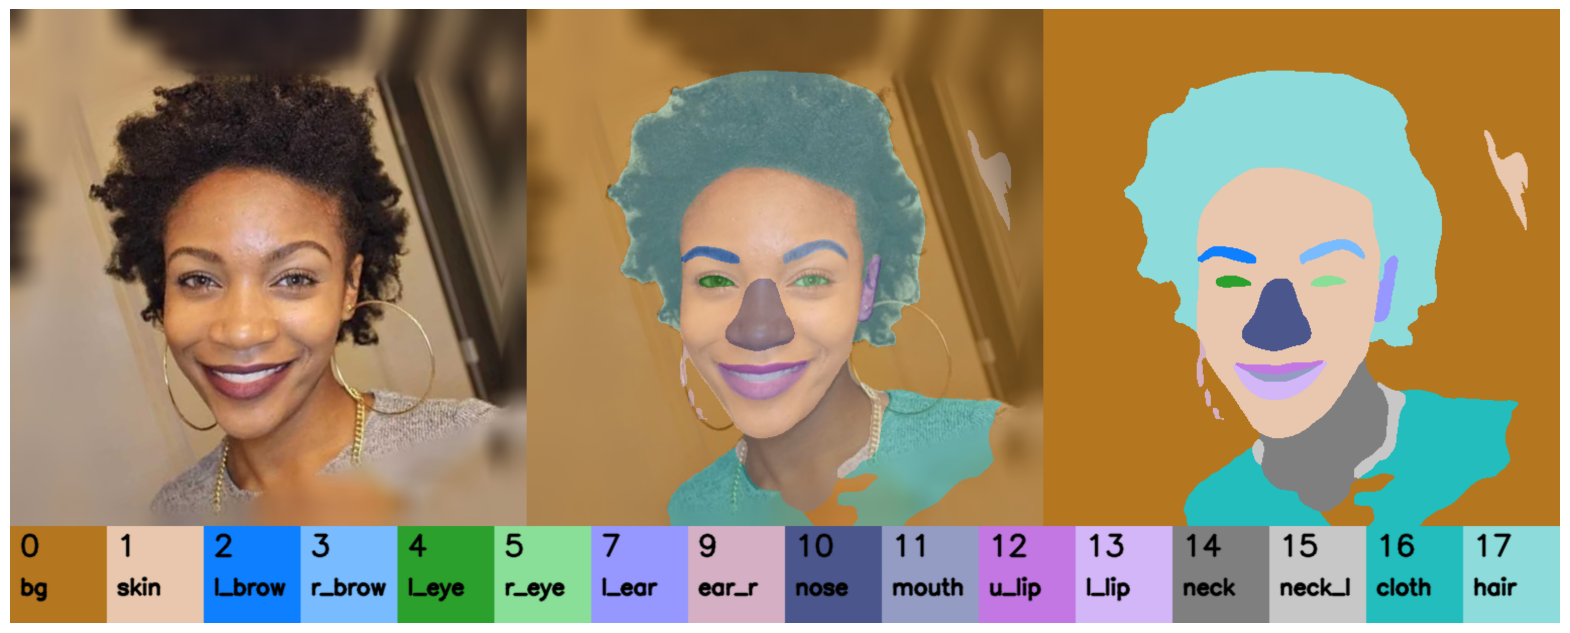

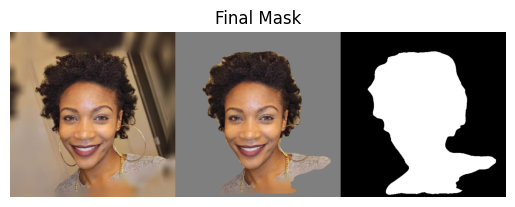

[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17]
uint8 16


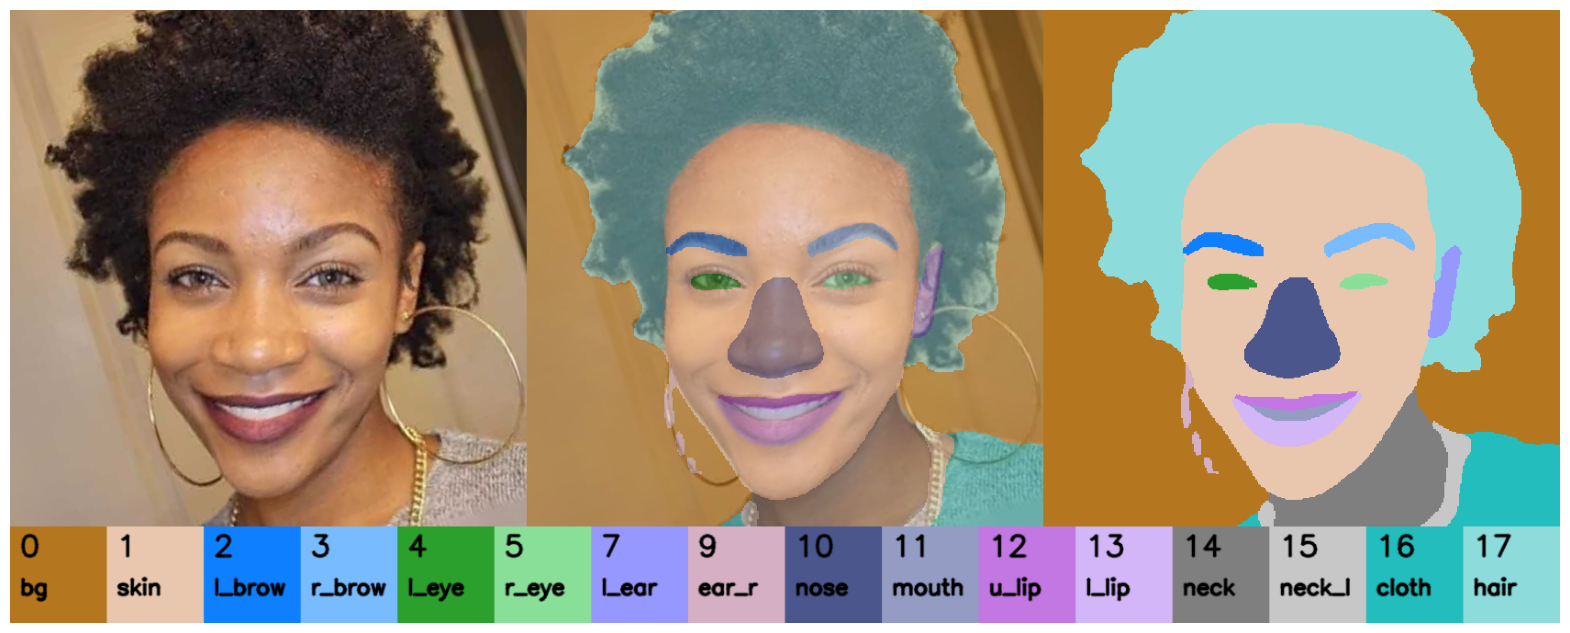

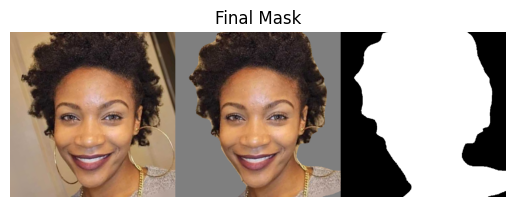

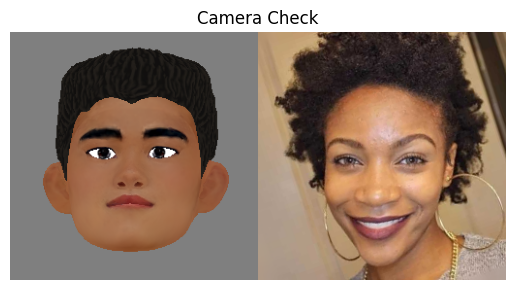

In [8]:
# img_path = '/home/tianhao/chence/DatProc/temp/samples/images/000031.png'
img_path = '/home/tianhao/chence/DatProc/temp/samples/images/000320.png'
# img_path = '/home/tianhao/chence/DatProc/temp/samples/images/FFHQ63777.png'
# img_path = '/home/tianhao/chence/DatProc/temp/samples/images/FFHQ63777Cropped.png'

# img_msk_path = '/home/tianhao/chence/DatProc/temp/samples/masks/000031.png'
img_msk_path = None

# img_par_path = '/home/tianhao/chence/DatProc/temp/samples/parsing/000031.png'
img_par_path = None

landmarks = np.load('/home/tianhao/chence/DatProc/temp/samples/landmarks/000320.npy').tolist()
# landmarks = None

info_dict, head_image, head_image_par, head_image_msk, cropped_img, cropped_img_par, cropped_img_msk = dpv1(img_path, img_msk_path, img_par_path, landmarks)

print(json.dumps(info_dict['head'], indent=4))

from visualize.vis_2d import show_parsing_result_colorized, show_image

vis_img = head_image.copy()
vis_img_msk = head_image_msk.copy()
vis_img_par = head_image_par.copy()

show_parsing_result_colorized(vis_img, vis_img_par, dpv1.hed_par.label)

msk_image = vis_img.copy()
msk_image[vis_img_msk == 0, :] = 127
mask_c3 = vis_img_msk[:, :, None].repeat(3, axis=2)
vis_image = np.hstack([vis_img, msk_image, mask_c3])
show_image(vis_image, is_bgr=False, title='Final Mask')

vis_img = cropped_img.copy()
vis_img_msk = cropped_img_msk.copy()
vis_img_par = cropped_img_par.copy()

show_parsing_result_colorized(vis_img, vis_img_par, dpv1.hed_par.label)

msk_image = vis_img.copy()
msk_image[vis_img_msk == 0, :] = 127
mask_c3 = vis_img_msk[:, :, None].repeat(3, axis=2)
vis_image = np.hstack([vis_img, msk_image, mask_c3])
show_image(vis_image, is_bgr=False, title='Final Mask')

from visualize.vis_3d import render_camera_check
show_image(render_camera_check(info_dict['head']['camera'], cropped_img, isBGR=False), is_bgr=False, title='Camera Check')

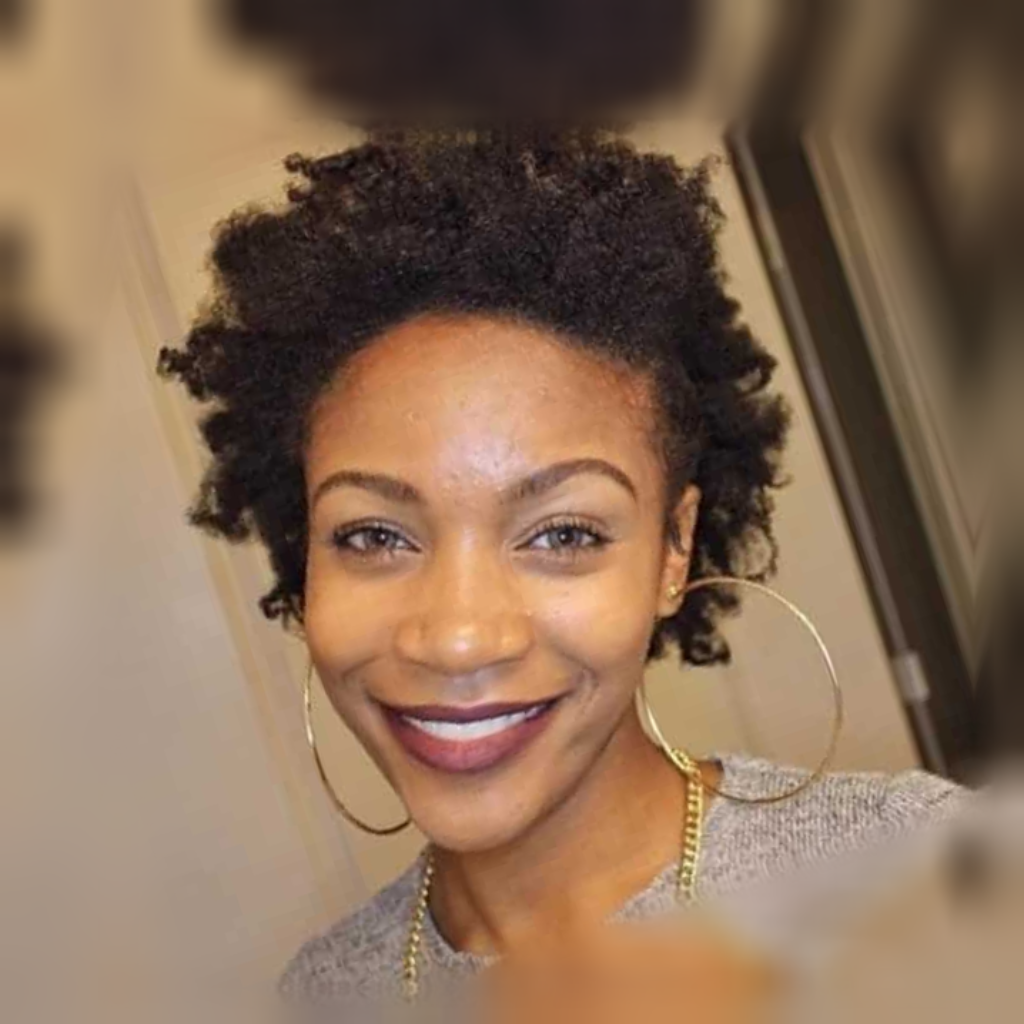

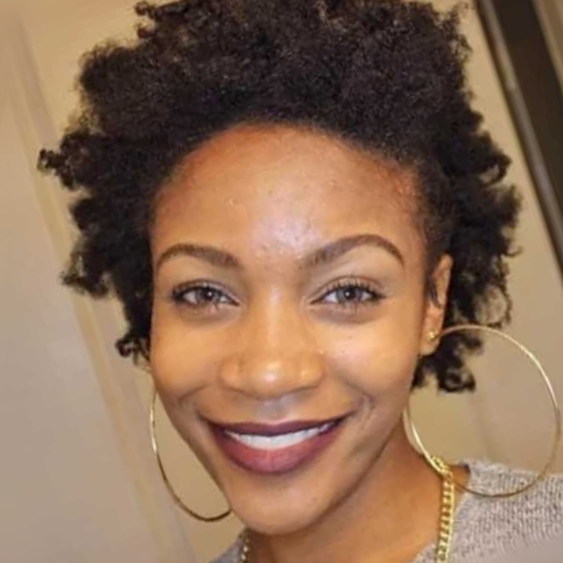

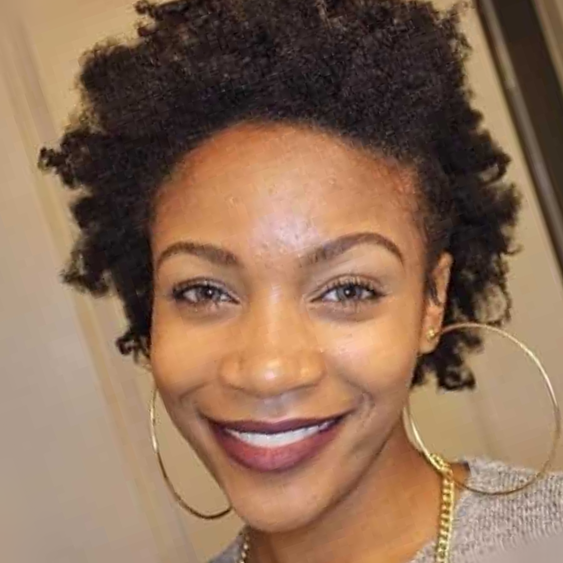

In [9]:
from PIL import Image

display(Image.fromarray(head_image))

a = dpv1.crop_head_image(head_image, info_dict['head']['align_box'])
a = cv2.resize(a, (dpv1.crop_size, dpv1.crop_size))

display(Image.fromarray(a))
display(Image.fromarray(cropped_img))


In [10]:
import os
import tqdm

img_dir = 'temp/samples/images'
img_msk_dir = 'temp/samples/masks'
img_par_dir = 'temp/samples/parsing'
landmarks_dir = 'temp/samples/landmarks'
save_dir = 'temp/samples/processed'

head_image_save_dir = osp.join(save_dir, 'head_image')
os.makedirs(head_image_save_dir, exist_ok=True)
head_image_par_save_dir = osp.join(save_dir, 'head_parsing')
os.makedirs(head_image_par_save_dir, exist_ok=True)
head_image_msk_save_dir = osp.join(save_dir, 'head_mask')
os.makedirs(head_image_msk_save_dir, exist_ok=True)

align_image_save_dir = osp.join(save_dir, 'align_image')
os.makedirs(align_image_save_dir, exist_ok=True)
align_image_par_save_dir = osp.join(save_dir, 'align_parsing')
os.makedirs(align_image_par_save_dir, exist_ok=True)
align_image_msk_save_dir = osp.join(save_dir, 'align_mask')
os.makedirs(align_image_msk_save_dir, exist_ok=True)

dataset_dict = {}

img_files = sorted(os.listdir(img_dir))

for img_file in tqdm.tqdm(img_files):
    img_path = osp.join(img_dir, img_file)

    img_msk_path = osp.join(img_msk_dir, img_file)
    if not osp.exists(img_msk_path):
        img_msk_path = None

    img_par_path = osp.join(img_par_dir, img_file)
    if not osp.exists(img_par_path):
        img_par_path = None

    landmarks_path = osp.join(landmarks_dir, img_file.replace('.png', '.npy'))
    try:
        if not osp.exists(landmarks_path):
            landmarks = None
        else:
            landmarks = np.load(landmarks_path).tolist()

        print(img_path, img_msk_path, img_par_path, landmarks)
        info_dict, head_image, head_image_par, head_image_msk, cropped_img, cropped_img_par, cropped_img_msk = dpv1(img_path, img_msk_path, img_par_path, landmarks)

        dataset_dict[img_file] = info_dict
        io.imsave(osp.join(head_image_save_dir, img_file), head_image)
        io.imsave(osp.join(head_image_par_save_dir, img_file), head_image_par)
        io.imsave(osp.join(head_image_msk_save_dir, img_file), head_image_msk)
        io.imsave(osp.join(align_image_save_dir, img_file), cropped_img)
        io.imsave(osp.join(align_image_par_save_dir, img_file), cropped_img_par)
        io.imsave(osp.join(align_image_msk_save_dir, img_file), cropped_img_msk)
    except Exception as e:
        print(e)
        continue

  0%|          | 0/10 [00:00<?, ?it/s]

temp/samples/images/000007.png temp/samples/masks/000007.png temp/samples/parsing/000007.png None
Image size too small
temp/samples/images/000013.png temp/samples/masks/000013.png temp/samples/parsing/000013.png None
Image size too small
temp/samples/images/000031.png temp/samples/masks/000031.png temp/samples/parsing/000031.png None


 30%|███       | 3/10 [00:16<00:39,  5.62s/it]

temp/samples/images/000060.png temp/samples/masks/000060.png temp/samples/parsing/000060.png None
Image size too small
temp/samples/images/000320.png temp/samples/masks/000320.png temp/samples/parsing/000320.png [[146.8984375, 226.9140625], [141.46875, 267.63671875], [137.396484375, 301.572265625], [137.396484375, 331.435546875], [131.966796875, 370.80078125], [131.966796875, 411.5234375], [141.46875, 445.458984375], [156.400390625, 484.82421875], [191.693359375, 514.6875], [241.91796875, 514.6875], [281.283203125, 495.68359375], [311.146484375, 475.322265625], [341.009765625, 445.458984375], [365.443359375, 415.595703125], [380.375, 391.162109375], [399.37890625, 361.298828125], [419.740234375, 326.005859375], [167.259765625, 237.7734375], [182.19140625, 232.34375], [201.1953125, 237.7734375], [221.556640625, 252.705078125], [236.48828125, 262.20703125], [305.716796875, 282.568359375], [326.078125, 282.568359375], [350.51171875, 282.568359375], [370.873046875, 292.0703125], [385.80468

 50%|█████     | 5/10 [00:17<00:15,  3.10s/it]

temp/samples/images/000679.png temp/samples/masks/000679.png temp/samples/parsing/000679.png [[578.876953125, 672.36328125], [630.44140625, 733.02734375], [682.005859375, 775.4921875], [733.5703125, 817.95703125], [794.234375, 857.388671875], [876.130859375, 887.720703125], [948.927734375, 887.720703125], [1042.95703125, 887.720703125], [1124.853515625, 848.2890625], [1167.318359375, 766.392578125], [1167.318359375, 702.6953125], [1146.0859375, 651.130859375], [1124.853515625, 578.333984375], [1094.521484375, 508.5703125], [1073.2890625, 444.873046875], [1042.95703125, 384.208984375], [1012.625, 299.279296875], [639.541015625, 611.69921875], [660.7734375, 569.234375], [691.10546875, 538.90234375], [733.5703125, 517.669921875], [773.001953125, 496.4375], [888.263671875, 402.408203125], [909.49609375, 372.076171875], [927.6953125, 332.64453125], [961.060546875, 299.279296875], [1000.4921875, 290.1796875], [897.36328125, 508.5703125], [939.828125, 548.001953125], [979.259765625, 578.33398

 60%|██████    | 6/10 [00:20<00:12,  3.06s/it]

temp/samples/images/FFHQ63777.png None None None



0: 640x640 26 objects, 18.9ms
Speed: 4.3ms preprocess, 18.9ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
 70%|███████   | 7/10 [00:38<00:20,  6.99s/it]

temp/samples/images/FFHQ63777Cropped.png None None None



0: 640x640 10 objects, 18.9ms
Speed: 4.2ms preprocess, 18.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
 80%|████████  | 8/10 [00:41<00:11,  5.92s/it]

temp/samples/images/man.jpg None None None



0: 640x640 5 objects, 19.0ms
Speed: 4.5ms preprocess, 19.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
 90%|█████████ | 9/10 [00:52<00:07,  7.43s/it]

temp/samples/images/woman.jpg None None None



0: 640x640 3 objects, 19.0ms
Speed: 5.0ms preprocess, 19.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
100%|██████████| 10/10 [01:08<00:00,  6.85s/it]


In [11]:
with open(osp.join(save_dir, 'dataset.json'), 'w') as f:
    json.dump(dataset_dict, f, indent=4)